# Avaliação 3 - Questão 2

O **sistema de Rössler** é uma adaptação do modelo de Lorentz, da forma : \\

$ \dot{x} = -y -z $ \\
$ \dot{y} = x + ay $ \\
$ \dot{z} = b + z(x-c) $ \\

Onde $a$, $b$ e $c$ são parâmetros constantes. Considerando $a$ = $b$ = $0.2$, determine: \\

a) O mapa de bifurcação do sistema em função do parâmetro $c$ ; \\
b) O formato do atrator estranho quando o sistema fica não periódico ; \\
c) O Mapa de Lorenz para este atrator estranho.

# (a) Mapa de Bifurcação em função do parâmetro $c$

Para construção do mapa de bifurcação, vamos considerar:

$ \dot{x} = -y -z = 0 \rightarrow y=-z $ \\
$ \dot{y} = x + ay = 0 \rightarrow x = -ay $ \\
$ \dot{z} = b + z(x-c) =0 \rightarrow b+ zx - zc = 0$ \\

Em função de $c$:

$ \dot{z} = b + z(x-c) =0 \rightarrow c = \dfrac{b+zx}{z}$ \\

Para a posição de equilíbrio, com $y = -z$ e $x = -ay$, então:

$z = \dfrac{x}{a} \rightarrow x = za$ \\

Substituindo na expressão de $c$: \\

$ c = \dfrac{b+z^2a}{z} $ \\

Escrevendo na forma: \\

$  zc = b+z^2a \rightarrow az^2 - cz + b =0 $ \\

Temos $\Delta = c^2-4ab$, logo: \\

$ z = \dfrac{c\pm\sqrt{\Delta}}{2a}   $ \\

Ou então:

$ z_1 = \dfrac{c+\sqrt{c^2-4ab}}{2a}   $ \\
$ z_2 = \dfrac{c-\sqrt{c^2-4ab}}{2a}   $ \\

Sabendo-se que $a=b=0.2$, então: \\

$ z_1 = \dfrac{c+\sqrt{c^2-0.16}}{0.4}   $ \\
$ z_2 = \dfrac{c-\sqrt{c^2-0.16}}{0.4}   $ \\

Em termos de $x$, $y$ e $z$, dizemos que o atrator de Rössler possui dois pontos fixos: \\

$ \mathbf{p}_{\pm} = \left\{ \begin{matrix}  
x_{\pm} = -0.2y_{\pm} \\
y_{\pm} = \dfrac{c\pm\sqrt{c^2-0.16}}{0.4}   \\
z_{\pm} = -y_{\pm}
\end{matrix}\right.  $ \\

No sistema Rössler, a mudança é induzida pela não linearidade que age quando a trajetória está suficientemente distante do ponto fixo $\mathbf{p}_{-}$, isto é, além do limite $(x − c)$ na terceira equação do sistema de Rössler. De fato, a não linearidade age quando a trajetória é suficientemente próxima do ponto fixo $ \mathbf{p}_{+}$ onde sua espiral convergente induz à dobra ao enviar a trajetória de volta para a vizinhança do ponto $\mathbf{p}_{-}$ ao longo de seu *manifold* instável. Assim, ponto fixo $\mathbf{p}_{-}$ é o responsável principalmente pelo alongamento e ponto fixo $\mathbf{p}_{+}$ pela dobra. Assim que o $\mathbf{p}_{+}$ se torna influente na trajetória, ocorre uma dobra. O ponto $\mathbf{p}_{-}$ apenas induz um mecanismo de alongamento.

No script a seguir, os diagramas de bifurcação foram calculados utilizando integração numérica pelo pacote $odeint$, com um incremento temporal de $0.01$ s durante $500$ segundos. Variou-se o valor de $c$ entre $1$ e $10$, utilizando para tanto $500$ amostras. Nota-se que o sistema entra em regime caótico quando $c$ se situa entre $4$ e $5$, tendo alguns momentos onde o sistema se move do caos para a ordem novamente (janelas). Esse fenômeno, em sistemas muito diferentes, pode exibir resultados muito semelhantes, independentemente de sua dinâmica subjacente. É comumente associado à descoberta de Mitchell Feigenbaum de que todos os sistemas que passam por esse caminho de duplicação do período para o caos obedecem uma constante matemática: a distância entre bifurcações consecutivas ao longo do eixo horizontal encolhe por um fator que assintoticamente se aproxima de $4.669$, agora conhecido como constante de Feigenbaum. Independentemente da dinâmica específica do sistema, a proporção das bifurcações em seu caminho para o caos sempre obedece a esta constante.


Progress: 100.0 %

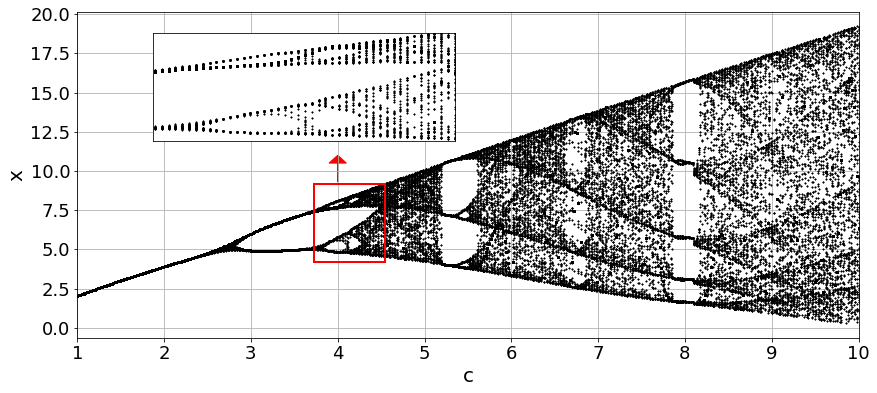

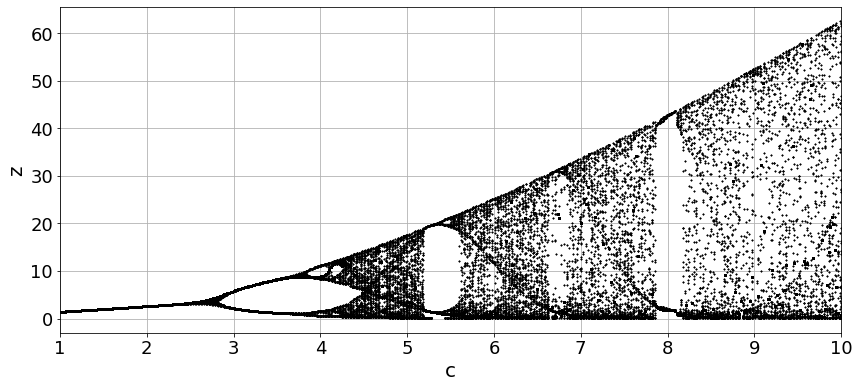

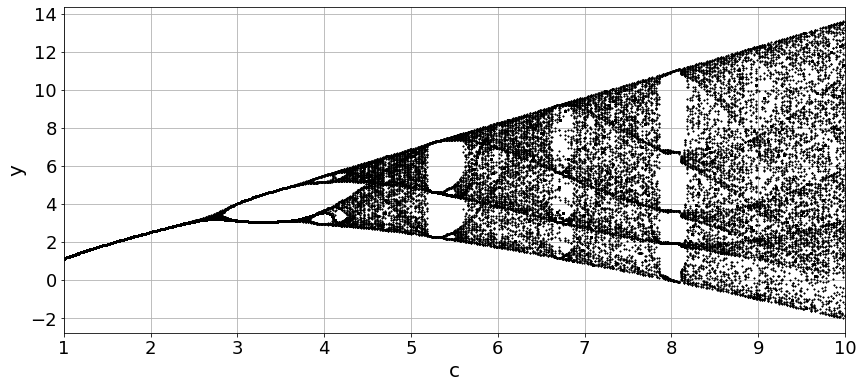

In [44]:
# Script para gerar o mapa de bifurcação em função do parâmetro c

# Carregando pacotes
import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy.integrate as integrate
from scipy.integrate import odeint
from scipy.signal import find_peaks

k = -1
dt = 0.01 # Incremento temporal [s]
tspan = np.arange(0,500,dt) # Vetor de tempo [s]

# Parâmetros do sistema
a = 0.2
b = 0.2

cSteps = 500 # Número de amostras para c
cs = np.linspace(1, 10, cSteps) # Criação do vetor c (inicial, final, número de amostras)

# Função para integração numérica
def frossler(x,t,a,b,c):
  x,y,z = x[0],x[1],x[2]
  dydt = [-y-z, x+a*y, b+z*(x-c)]
  return dydt

eps = np.finfo(float).eps

# Início do laço para cálculo do diagrama
for c in cs:

  x0 = np.array((0,0,0)) # Condições iniciais nulas
  k = k+1
  sol = odeint(frossler, x0, tspan, args=(a,b,c)) # Solução do sistema 
  count = np.asarray(np.where(tspan>100)) # Retirando o regime transiente da solução

  x = np.zeros((len(count[0]),len(sol[0])))

  # Atribuindo os vetores solução a x
  for p in range(0,len(count[0])):
    for q in range(0,len(sol[0])):
      x[p][q] = sol[p+count[0][0]][q]

  j = 0
  g = 0
  s = 0
  n = len(x)
  
  # Criação dos vetores que armazenarão os valores dos picos
  # Aqui tendo em mente que quando a derivada é igual a zero, temos um ponto de máximo (pico)
  if c==cs[0]:
    xmax = np.zeros((len(cs),len(x)))
    zmax = np.zeros((len(cs),len(x)))
    ymax = np.zeros((len(cs),len(x)))

  # Atribuindo valores de pico
  peaks_x = find_peaks(x[:,0], prominence=0.1)
  peaks_x = np.asarray(peaks_x)

  peaks_z = find_peaks(x[:,2], prominence=0.1)
  peaks_z = np.asarray(peaks_z)

  peaks_y = find_peaks(x[:,1], prominence=0.1)
  peaks_y = np.asarray(peaks_y)

  ypeaks_x = np.zeros(len(peaks_x[0]))
  ypeaks_z = np.zeros(len(peaks_z[0]))
  ypeaks_y = np.zeros(len(peaks_y[0]))


  for i in range(0,len(peaks_x[0])):
    ypeaks_x[i] = x[peaks_x[0][i]][0]

  for i in range(0,len(peaks_z[0])):
    ypeaks_z[i] = x[peaks_z[0][i]][2]

  for i in range(0,len(peaks_y[0])):
    ypeaks_y[i] = x[peaks_y[0][i]][1]

  for i in range(0,len(ypeaks_x)):
  #  if ( (x[i-1][0]+.012) < x[i][0]) and (x[i][0] > (x[i+1][0]+.012) ):
      xmax[k][j]=ypeaks_x[i]
      j = j+1

  for i in range(0,len(ypeaks_z)):
  #  if ( (z[i-1][0]+.012) < z[i][0]) and (z[i][0] > (z[i+1][0]+.012) ):
      zmax[k][g]=ypeaks_z[i]
      g = g+1

  for i in range(0,len(ypeaks_y)):
  #  if ( (y[i-1][0]+.012) < y[i][0]) and (y[i][0] > (y[i+1][0]+.012) ):
      ymax[k][s]=ypeaks_y[i]
      s = s+1

   # Barra de progresso
  sys.stdout.flush()
  sys.stdout.write("\rProgress: {} %".format(((c-cs[0])/(cs[-1]-cs[0]))*100))

# Como os vetores xmax e zmax possuem elementos nulos, dada sua criação com zeros e o não preenchimento completo,
# vamos atribuir aos valores nulos o primeiro valor de cada vetor, preenchendo assim e não deixando valores
# iguais a zero que não são parte da solução.

for i in range(0,len(xmax)):
  for j in range(0,len(xmax[0])):
    if xmax[i][j] == 0:
      xmax[i][j] = xmax[i][0]

for i in range(0,len(zmax)):
  for j in range(0,len(zmax[0])):
    if zmax[i][j] == 0:
      zmax[i][j] = zmax[i][0]

for i in range(0,len(ymax)):
  for j in range(0,len(ymax[0])):
    if ymax[i][j] == 0:
      ymax[i][j] = ymax[i][0]

# Plot de resultados

# Para x:
from matplotlib.patches import Rectangle

plt.figure(figsize=(14,6))
for i in range(0,len(cs)):
  plt.plot(cs[i]*np.ones(len(xmax[0])),xmax[i,:],'k*',markersize=1.5)

plt.grid()
plt.xlabel("c",fontsize=20)
plt.ylabel("x",fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(cs[0],cs[-1])

plt.arrow(4, 9.3, 0, 1.7, length_includes_head=True,
          head_width=0.2, head_length=0.5,color='r')

with plt.rc_context({'axes.edgecolor':'red','axes.linewidth':2}):
    # Temporary rc parameters in effect
    b = plt.axes([0.36, 0.3, .07, 0.18], facecolor='none')
    plt.xticks([])
    plt.yticks([])

a = plt.axes([0.2, 0.58, .3, .25], facecolor='w')
for i in range(0,len(cs)):
  plt.plot(cs[i]*np.ones(len(xmax[0])),xmax[i,:],'k*',markersize=1.5)

plt.xlim(3.7, 4.5)
plt.ylim(4.5,9)
plt.xticks([])
plt.yticks([])
plt.show()


# Para z:
plt.figure(figsize=(14,6))
for i in range(0,len(cs)):
  plt.plot(cs[i]*np.ones(len(zmax[0])),zmax[i,:],'k*',markersize=1.5)

plt.grid()
plt.xlabel("c",fontsize=20)
plt.ylabel("z",fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(cs[0],cs[-1])
plt.show()

# Para y:
plt.figure(figsize=(14,6))
for i in range(0,len(cs)):
  plt.plot(cs[i]*np.ones(len(ymax[0])),ymax[i,:],'k*',markersize=1.5)

plt.grid()
plt.xlabel("c",fontsize=20)
plt.ylabel("y",fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(cs[0],cs[-1])
plt.show()

# (b) Formato do atrator estranho quando o sistema fica não periódico

Para esta etapa, selecionou-se o valor de $c$ igual a $5$ para garantir que o sistema esteja em regime caótico (não periódico). Foi feita a integração numérica utilizando o método de Euler, com um incremento temporal de $0.001$ s durante $1200$ segundos. Nota-se pelas séries temporais que não há periodicidade, e o gráfico do atrator estranho indica esta constatação pela quantidade de linhas presentes. 


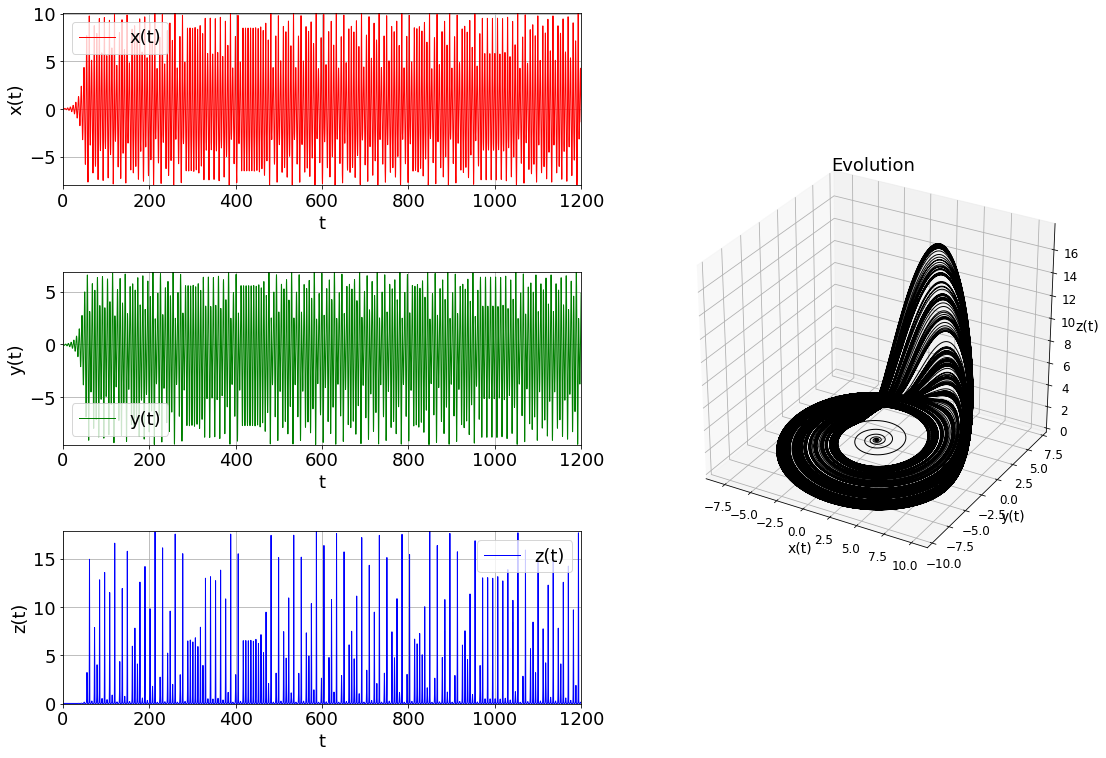

In [45]:
# Atrator de Rossler - agora considerando um c fixo

# Carregando pacotes
from numpy import *
from matplotlib import *
from scipy import *
from pylab import figure, show, setp
from mpl_toolkits.mplot3d import Axes3D

# Função que será utilizada para integrar o sistema (na forma recursiva)
def frossler(x_n,y_n,z_n,h,a,b,c):
    x_n1 = x_n + h*(-y_n-z_n)
    y_n1 = y_n + h*(x_n+a*y_n)
    z_n1 = z_n + h*(b+z_n*(x_n-c))   
    return x_n1,y_n1,z_n1

# Parâmetros do sistema
a = 0.2
b = 0.2
c = 5 # Garantindo o sistema não periódico (caos)

# Parâmetros para integração das equações
t_ini = 0 # Tempo inicial [s]
t_fin = 1200 # Tempo final [s]
h = 0.001 # Passo
numsteps = int((t_fin-t_ini)/h) # Número de amostras

# Vetor temporal
t=numpy.linspace(t_ini,t_fin,numsteps) # [s]

# Vetor de soluções
x=numpy.zeros(numsteps)
y=numpy.zeros(numsteps)
z=numpy.zeros(numsteps)

# Condições iniciais do sistema
x[0]=0
y[0]=0
z[0]=0

# Resolução do sistema (integração por Euler) por meio da função f_rossler. Forma recursiva
for k in range(x.size-1):
    [x[k+1],y[k+1],z[k+1]] = frossler(x[k],y[k],z[k],t[k+1]-t[k],a,b,c)
    
# Vamos criar uma figura com 4 plots, sendo as 3 séries temporais em x, y e z e um plot 3D do atrator

fig = figure(figsize=(18,12))
ax1 = fig.add_axes([0.1, 0.7, 0.4, 0.2])
ax2 = fig.add_axes([0.1, 0.4, 0.4, 0.2])
ax3 = fig.add_axes([0.1, 0.1, 0.4, 0.2])
ax4 = fig.add_axes([0.55, 0.25, 0.35, 0.5],projection='3d')

ax1.plot(t, x,color='red',lw=1,label='x(t)')
ax1.set_xlabel('t',fontsize=18)
ax1.set_ylabel('x(t)',fontsize=18)
ax1.tick_params(axis='both', labelsize=18)
ax1.legend(prop={"size":18})
ax1.grid()
ax1.axis((t_ini,t_fin,min(x),max(x)))

ax2.plot(t, y,color='green',lw=1,label='y(t)')
ax2.set_xlabel('t',fontsize=18)
ax2.set_ylabel('y(t)',fontsize=18)
ax2.tick_params(axis='both', labelsize=18)
ax2.legend(prop={"size":18})
ax2.grid()
ax2.axis((t_ini,t_fin,min(y),max(y)))

ax3.plot(t, z,color='blue',lw=1,label='z(t)')
ax3.set_xlabel('t',fontsize=18)
ax3.set_ylabel('z(t)',fontsize=18)
ax3.tick_params(axis='both', labelsize=18)
ax3.legend(prop={"size":18})
ax3.grid()
ax3.axis((t_ini,t_fin,min(z),max(z)))

ax4.plot(x, y,z,color='black',lw=1,label='Evolution(t)')
ax4.set_xlabel('x(t)',fontsize=14)
ax4.set_ylabel('y(t)',fontsize=14)
ax4.set_zlabel('z(t)',fontsize=14)
ax4.tick_params(axis='both', labelsize=12)
ax4.set_title('Evolution',fontsize=18)
ax4.grid()
show()


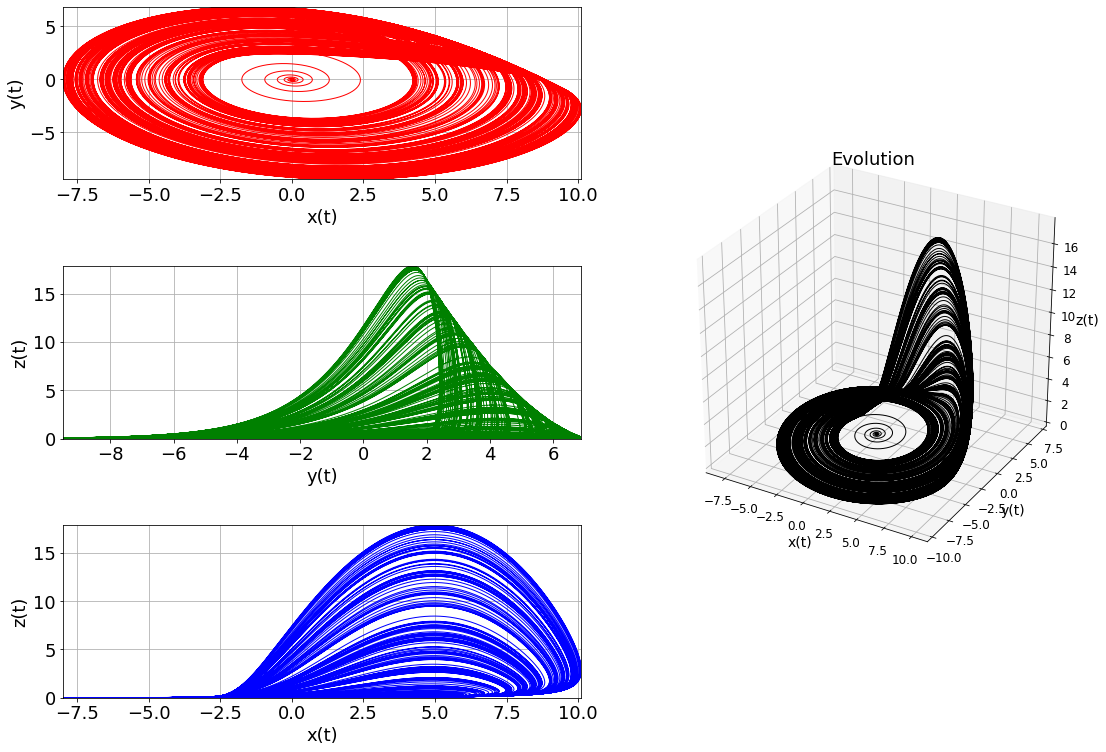

In [46]:
# Agora, vamos criar um plot com o atrator em 3D e suas 3 vistas

fig = figure(figsize=(18,12))
ax1 = fig.add_axes([0.1, 0.7, 0.4, 0.2])
ax2 = fig.add_axes([0.1, 0.4, 0.4, 0.2])
ax3 = fig.add_axes([0.1, 0.1, 0.4, 0.2])
ax4 = fig.add_axes([0.55, 0.25, 0.35, 0.5],projection='3d')

ax1.plot(x, y,color='red',lw=1)
ax1.set_xlabel('x(t)',fontsize=18)
ax1.set_ylabel('y(t)',fontsize=18)
ax1.tick_params(axis='both', labelsize=18)
ax1.grid()
ax1.axis((min(x),max(x),min(y),max(y)))

ax2.plot(y, z,color='green',lw=1)
ax2.set_xlabel('y(t)',fontsize=18)
ax2.set_ylabel('z(t)',fontsize=18)
ax2.tick_params(axis='both', labelsize=18)
ax2.grid()
ax2.axis((min(y),max(y),min(z),max(z)))

ax3.plot(x, z,color='blue',lw=1)
ax3.set_xlabel('x(t)',fontsize=18)
ax3.set_ylabel('z(t)',fontsize=18)
ax3.tick_params(axis='both', labelsize=18)
ax3.grid()
ax3.axis((min(x),max(x),min(z),max(z)))

ax4.plot(x,y,z,color='black',lw=1,label='Evolution(t)')
ax4.set_xlabel('x(t)',fontsize=14)
ax4.set_ylabel('y(t)',fontsize=14)
ax4.set_zlabel('z(t)',fontsize=14)
ax4.tick_params(axis='both', labelsize=12)
ax4.set_title('Evolution',fontsize=18)
ax4.grid()
show()

 Para complementar a análise, foi elaborado um gráfico com base no conceito do mapa de Poincaré, para um intervalo de mapeamento de $1000$ amostras, ou seja, a cada $1000$ amostras, mapeou-se o espaço de fases. Logicamente, este período pode ser alterado. Observou-se, após esta análise, a presença de uma forma, embora com um padrão não tão definido. Para sanar esta necessidade, foi feito então o mapa de Lorenz, que é mostrado na sequência.

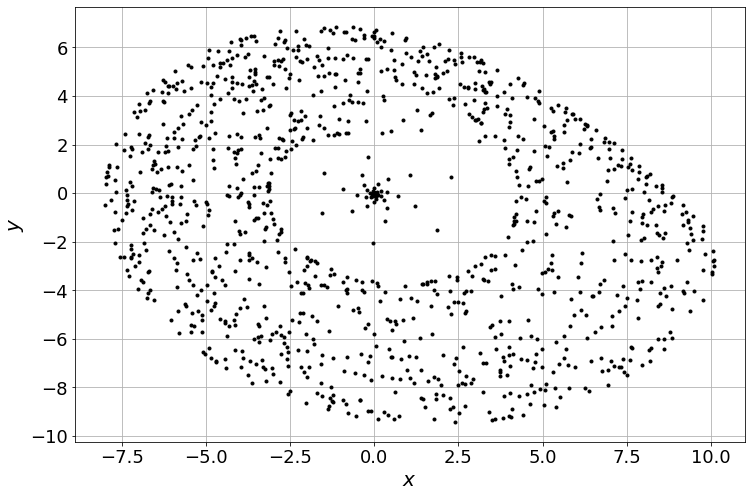

In [47]:
# Mapeamento do espaço de fase

x_poinc = np.zeros(len(x))
y_poinc = np.zeros(len(y))
z_poinc = np.zeros(len(z))
j = 0
k = 0
m = 0
i = 0

while j<len(x):
  x_poinc[i] = x[j]
  i += 1
  j += 1000

i=0
while k<len(y):
  y_poinc[i] = y[k]
  i += 1
  k += 1000

i=0
while m<len(z):
  z_poinc[i] = z[m]
  i += 1
  m += 1000

for i in range(0,len(x_poinc)):
  if x_poinc[i]==0:
    x_poinc[i]=x_poinc[0]
  if y_poinc[i]==0:
    y_poinc[i]=y_poinc[0]
  if z_poinc[i]==0:
    z_poinc[i]=z_poinc[0]

fig = plt.figure(figsize=(12,8))
plt.plot(x_poinc,y_poinc,'k.')
plt.grid()
plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# (c) Mapa de Lorenz para este atrator estranho

Para o mapa de Lorenz do atrator estranho anterior, foram coletados os picos das respostas temporais para $x$, $y$ e $z$, de modo que ao se plotar $x_n$ por $x_{n+1}$, $z_n$ por $z_{n+1}$ e $y_n$ por $y_{n+1}$, é claramente visível a formação de um padrão, ou seja, ordem aparece no caos. 

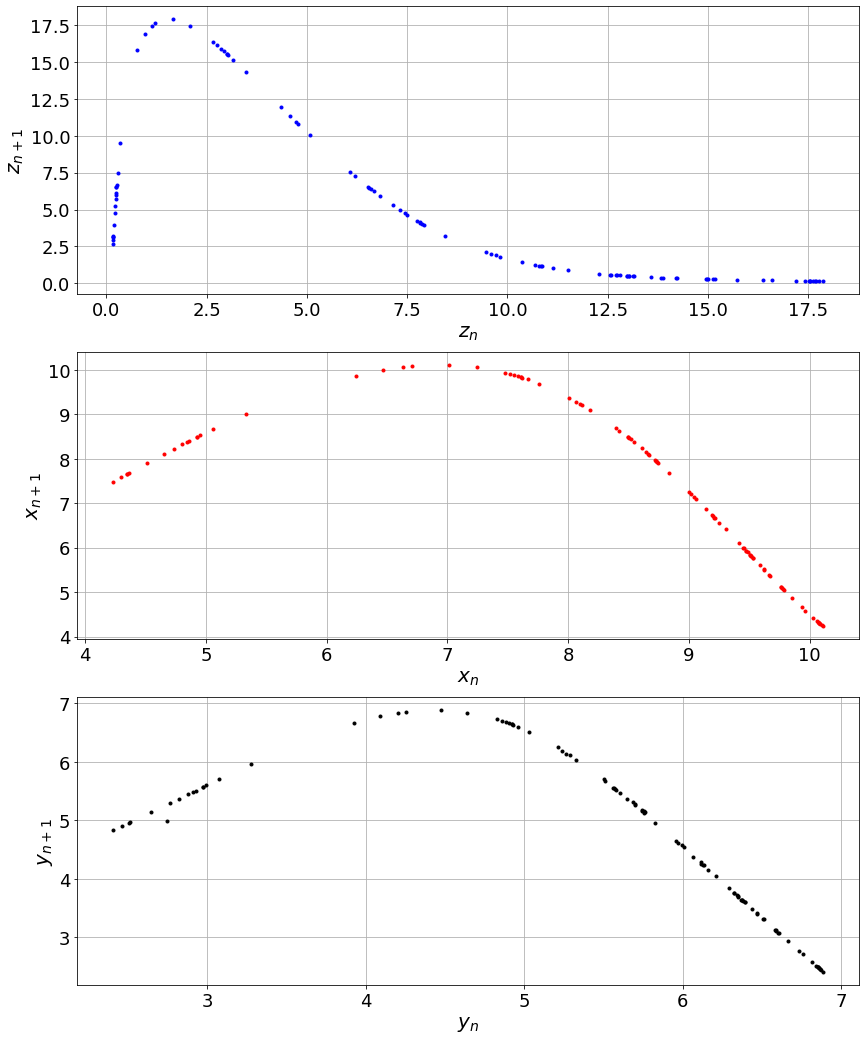

In [48]:
# Mapa de Lorenz

# Carregando pacotes
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

burn=0

# Calculando os picos
peaks_z = find_peaks(z[burn:], prominence=0.1)
peaks_x = find_peaks(x[burn:], prominence=6)
peaks_y = find_peaks(y[burn:], prominence=4)

# Calculando z_n, z_{n+1}, x_n e x_{n+1}
z_n = np.zeros(int(len(peaks_z[0])/2))
z_nplus1 = np.zeros(int(len(peaks_z[0])/2))
x_n = np.zeros(int(len(peaks_x[0])/2))
x_nplus1 = np.zeros(int(len(peaks_x[0])/2))
y_n = np.zeros(int(len(peaks_y[0])/2))
y_nplus1 = np.zeros(int(len(peaks_y[0])/2))

peaks_z = np.asarray(peaks_z)
ypeaks_z = np.zeros(len(peaks_z[0]))
peaks_x = np.asarray(peaks_x)
ypeaks_x = np.zeros(len(peaks_x[0]))
peaks_y = np.asarray(peaks_y)
ypeaks_y = np.zeros(len(peaks_y[0]))

for i in range(0,len(peaks_z[0])):
  ypeaks_z[i] = z[burn+peaks_z[0][i]]

for i in range(0,len(peaks_x[0])):
  ypeaks_x[i] = x[burn+peaks_x[0][i]]

for i in range(0,len(peaks_y[0])):
  ypeaks_y[i] = y[burn+peaks_y[0][i]]

j=0
for i in range(0,int(len(peaks_z[0])/2)):
  z_n[i] = ypeaks_z[i+j]
  z_nplus1[i] = ypeaks_z[i+j+1]
  j=j+1

j=0
for i in range(0,int(len(peaks_x[0])/2)):
  x_n[i] = ypeaks_x[i+j]
  x_nplus1[i] = ypeaks_x[i+j+1]
  j=j+1

j=0
for i in range(0,int(len(peaks_y[0])/2)):
  y_n[i] = ypeaks_y[i+j]
  y_nplus1[i] = ypeaks_y[i+j+1]
  j=j+1

# Plotando o resultado
fig = plt.figure(figsize=(14,18))

fig.add_subplot(3, 1, 1)
plt.plot(z_n,z_nplus1,'b.')
plt.grid()
plt.xlabel('$z_{n}$',fontsize=20)
plt.ylabel('$z_{n+1}$',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

fig.add_subplot(3, 1, 2)
plt.plot(x_n,x_nplus1,'r.')
plt.grid()
plt.xlabel('$x_{n}$',fontsize=20)
plt.ylabel('$x_{n+1}$',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

fig.add_subplot(3, 1, 3)
plt.plot(y_n,y_nplus1,'k.')
plt.grid()
plt.xlabel('$y_{n}$',fontsize=20)
plt.ylabel('$y_{n+1}$',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Abaixo temos os picos em sobreposição às respostas temporais.

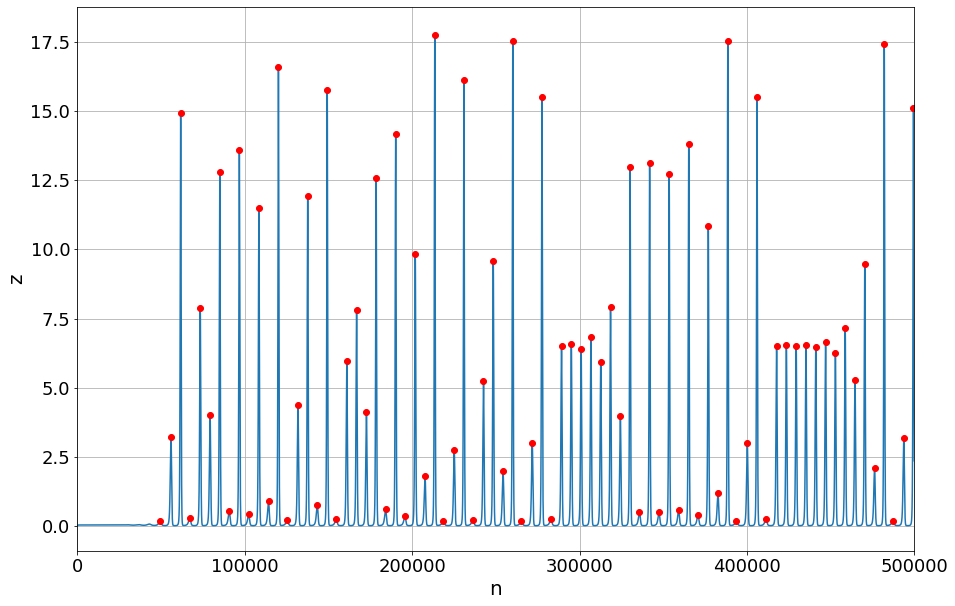

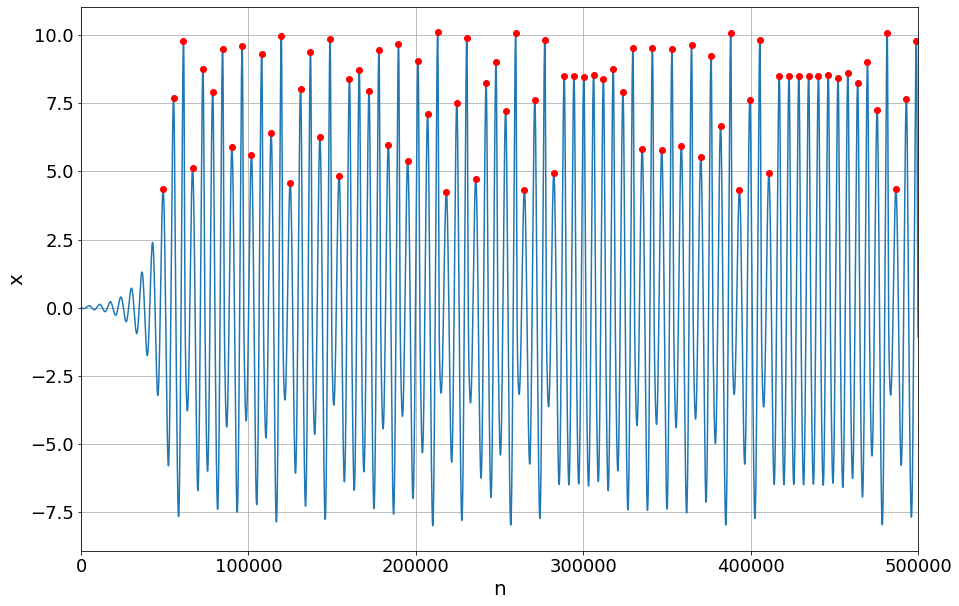

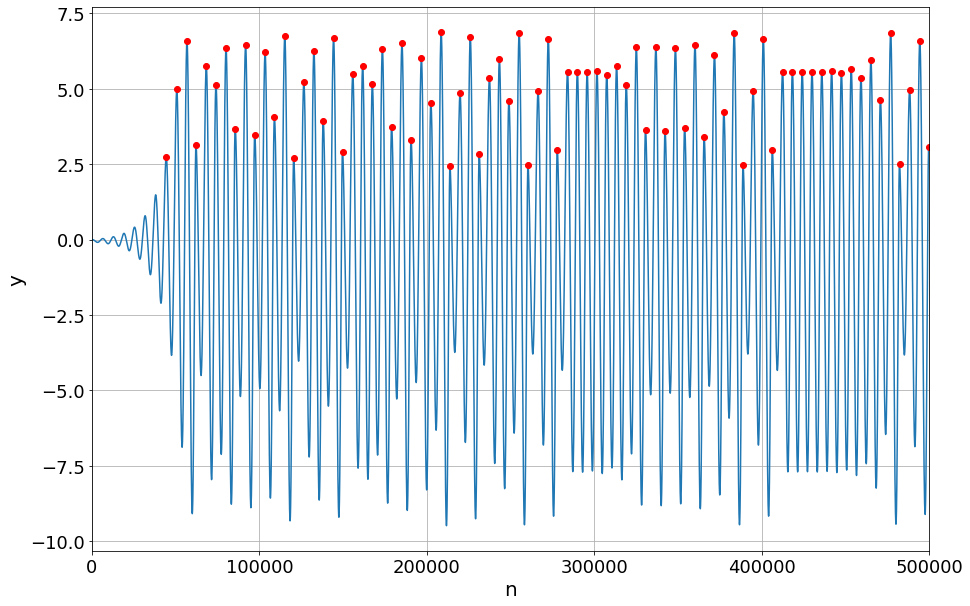

In [49]:
# Aqui mostrando a série temporal z e os picos calculados, para um determinado intervalo

# Para z
plt.figure(figsize=(15,10))
plt.plot(z[burn:])
plt.plot(peaks_z[0],ypeaks_z,'ro')
plt.xlabel('n',fontsize=20)
plt.ylabel('z',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0,500000)
plt.grid()
plt.show()

# Para x
plt.figure(figsize=(15,10))
plt.plot(x[burn:])
plt.plot(peaks_x[0],ypeaks_x,'ro')
plt.xlabel('n',fontsize=20)
plt.ylabel('x',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0,500000)
plt.grid()
plt.show()

# Para y
plt.figure(figsize=(15,10))
plt.plot(y[burn:])
plt.plot(peaks_y[0],ypeaks_y,'ro')
plt.xlabel('n',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0,500000)
plt.grid()
plt.show()

Para finalizar o estudo, como forma complementar de visualização, foram plotados 4 gráficos do espaço de fases no plano $x-y$ para diferentes valores de $c$, com o intuito de visualizar as respostas periódicas e a resposta caótica quando $c$ se aproxima do valor $5$.

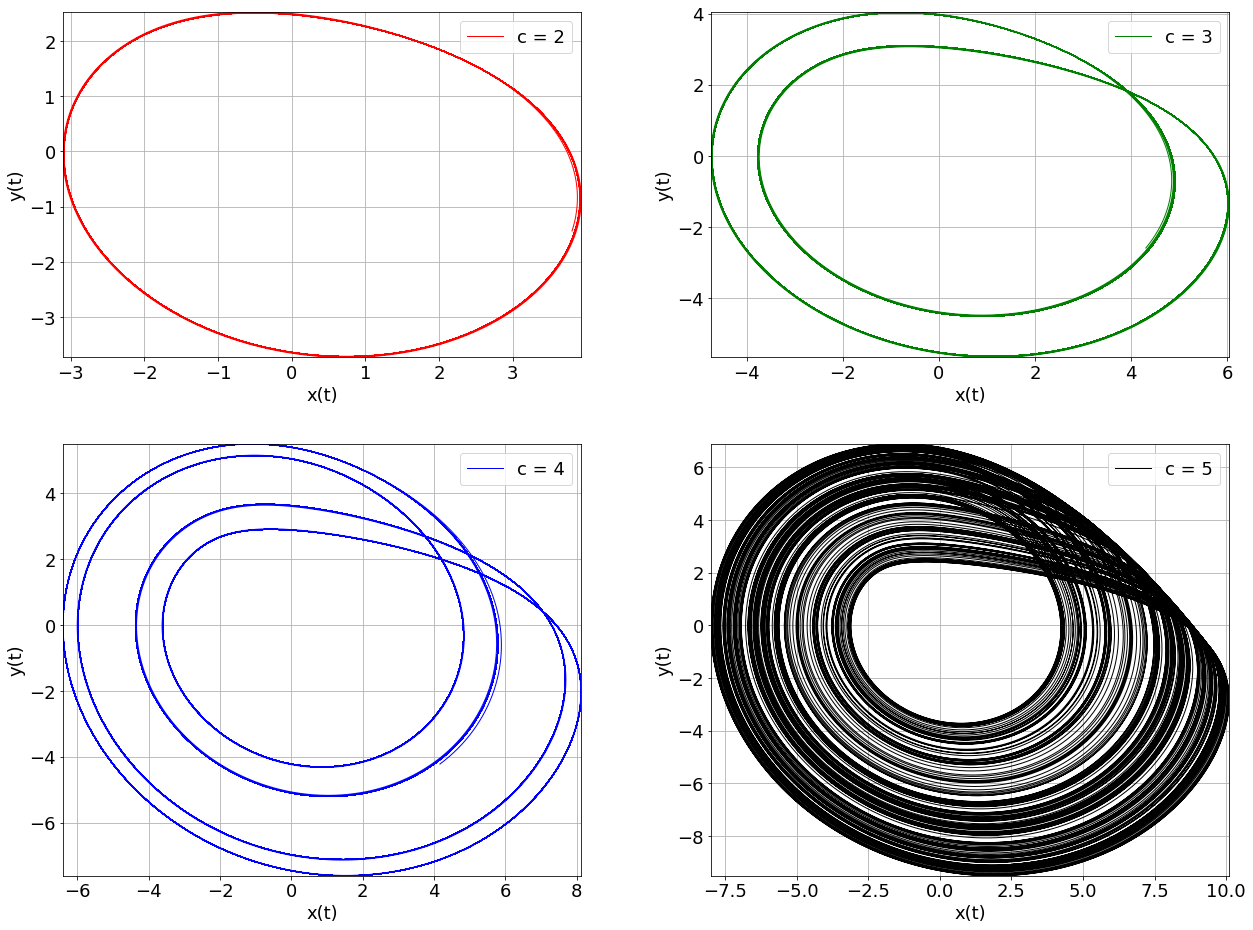

In [50]:
# Atrator de Rossler - para 4 diferentes valores de C

# Função que será utilizada para integrar o sistema (na forma recursiva)
def frossler(x_n,y_n,z_n,h,a,b,c):
    x_n1 = x_n + h*(-y_n-z_n)
    y_n1 = y_n + h*(x_n+a*y_n)
    z_n1 = z_n + h*(b+z_n*(x_n-c))   
    return x_n1,y_n1,z_n1

# Parâmetros do sistema
a = 0.2
b = 0.2
c = np.array((2,3,4,5)) # Vetores de c

# Parâmetros para integração das equações
t_ini = 0 # Tempo inicial [s]
t_fin = 1200 # Tempo final [s]
h = 0.001 # Passo
numsteps = int((t_fin-t_ini)/h) # Número de amostras

# Vetor temporal
t=numpy.linspace(t_ini,t_fin,numsteps) # [s]

# Vetor de soluções
x=numpy.zeros((len(c),numsteps))
y=numpy.zeros((len(c),numsteps))
z=numpy.zeros((len(c),numsteps))

# Condições iniciais do sistema
x[:,0]=0
y[:,0]=0
z[:,0]=0

# Resolução do sistema (integração por Euler) por meio da função f_rossler. Forma recursiva
for i in range(0,len(c)):
  for k in range(x[0].size-1):
      [x[i,k+1],y[i,k+1],z[i,k+1]] = frossler(x[i,k],y[i,k],z[i,k],t[k+1]-t[k],a,b,c[i])
    
# Vamos criar uma figura com 4 plots, sendo a vista do atrator no plano x-y para as 4 condições de c
limiar = 60000

fig = figure(figsize=(18,12))
ax1 = fig.add_axes([0.1, 0.6, 0.4, 0.4])
ax2 = fig.add_axes([0.6, 0.6, 0.4, 0.4])
ax3 = fig.add_axes([0.1, 0, 0.4, 0.5])
ax4 = fig.add_axes([0.6, 0, 0.4, 0.5])

ax1.plot(x[0,limiar:], y[0,limiar:],color='red',lw=1,label='c = 2')
ax1.set_xlabel('x(t)',fontsize=18)
ax1.set_ylabel('y(t)',fontsize=18)
ax1.tick_params(axis='both', labelsize=18)
ax1.legend(prop={"size":18})
ax1.grid()
ax1.axis((min(x[0,limiar:]),max(x[0,limiar:]),min(y[0,limiar:]),max(y[0,limiar:])))

ax2.plot(x[1,limiar:], y[1,limiar:],color='green',lw=1,label='c = 3')
ax2.set_xlabel('x(t)',fontsize=18)
ax2.set_ylabel('y(t)',fontsize=18)
ax2.tick_params(axis='both', labelsize=18)
ax2.legend(prop={"size":18})
ax2.grid()
ax2.axis((min(x[1,limiar:]),max(x[1,limiar:]),min(y[1,limiar:]),max(y[1,limiar:])))

ax3.plot(x[2,limiar:], y[2,limiar:],color='blue',lw=1,label='c = 4')
ax3.set_xlabel('x(t)',fontsize=18)
ax3.set_ylabel('y(t)',fontsize=18)
ax3.tick_params(axis='both', labelsize=18)
ax3.legend(prop={"size":18})
ax3.grid()
ax3.axis((min(x[2,limiar:]),max(x[2,limiar:]),min(y[2,limiar:]),max(y[2,limiar:])))

ax4.plot(x[3,limiar:], y[3,limiar:],color='black',lw=1,label='c = 5')
ax4.set_xlabel('x(t)',fontsize=18)
ax4.set_ylabel('y(t)',fontsize=18)
ax4.tick_params(axis='both', labelsize=18)
ax4.legend(prop={"size":18})
ax4.grid()
ax4.axis((min(x[3,limiar:]),max(x[3,limiar:]),min(y[3,limiar:]),max(y[3,limiar:])))
show()
